# Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
import json

from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import sent_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Transformers installation
! pip install transformers
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

In [ ]:
iphone_tweets = pd.read_csv("iphone_13_pre_release.csv")
print("Dataframe shape:", iphone_tweets.shape)
iphone_tweets.head()

Dataframe shape: (5000, 29)


Unnamed: 0                           _type  \
0           0  snscrape.modules.twitter.Tweet   
1           1  snscrape.modules.twitter.Tweet   
2           2  snscrape.modules.twitter.Tweet   
3           3  snscrape.modules.twitter.Tweet   
4           4  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/310log/status/144046576094...   
1  https://twitter.com/sraj49/status/144046559468...   
2  https://twitter.com/musicalantlers/status/1440...   
3  https://twitter.com/itzjoshtho/status/14404654...   
4  https://twitter.com/eduardomesck/status/144046...   

                        date  \
0  2021-09-21 23:59:34+00:00   
1  2021-09-21 23:58:54+00:00   
2  2021-09-21 23:58:28+00:00   
3  2021-09-21 23:58:25+00:00   
4  2021-09-21 23:58:08+00:00   

                                          rawContent  \
0  Â∏´Âå†ÂΩìÁÑ∂Ë≤∑„Å£„Å¶„Åü iPad mini 6„ÅØ„ÄÅiPhone 13„Çà„ÇäÊ¨≤„Åó„ÅÑÁ´ØÊú´„ÉÉ!!! „Å¶„ÅÑ„ÅÜ...   
1  @lanawithanxiety With 5000 mah battery, best c...   
2  @StevenRayMorris I currently have the Pro 12 M...   
3  Fuming at how shite the IPhone 13 Pro Max is, ...   
4  a√≠ que ran√ßo, as cases do iphone 12 n√£o v√£o se...   

                                     renderedContent                   id  \
0  Â∏´Âå†ÂΩìÁÑ∂Ë≤∑„Å£„Å¶„Åü„ÄÄiPad mini 6„ÅØ„ÄÅiPhone 13„Çà„ÇäÊ¨≤„Åó„ÅÑÁ´ØÊú´„ÉÉ!!!„ÄÄ„Å¶„ÅÑ„ÅÜ...  1440465760942313479   
1  @lanawithanxiety With 5000 mah battery, best c...  1440465594684379138   
2  @StevenRayMorris I currently have the Pro 12 M...  1440465482025357320   
3  Fuming at how shite the IPhone 13 Pro Max is, ...  1440465469056565253   
4  a√≠ que ran√ßo, as cases do iphone 12 n√£o v√£o se...  1440465399162630150   

                                                user  replyCount  \
0  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
2  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
3  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
4  {'_type': 'snscrape.modules.twitter.User', 'us...           1   

   retweetCount  ...  retweetedTweet  quotedTweet  inReplyToTweetId  \
0             0  ...             NaN          NaN               NaN   
1             0  ...             NaN          NaN               NaN   
2             0  ...             NaN          NaN      1.440192e+18   
3             0  ...             NaN          NaN               NaN   
4             1  ...             NaN          NaN               NaN   

                                       inReplyToUser  \
0                                                NaN   
1                                                NaN   
2  {'_type': 'snscrape.modules.twitter.User', 'us...   
3                                                NaN   
4                                                NaN   

                                      mentionedUsers  \
0                                                NaN   
1                                                NaN   
2  [{'_type': 'snscrape.modules.twitter.User', 'u...   
3                                                NaN   
4                                                NaN   

                                         coordinates  \
0                                                NaN   
1  {'_type': 'snscrape.modules.twitter.Coordinate...   
2                                                NaN   
3                                                NaN   
4  {'_type': 'snscrape.modules.twitter.Coordinate...   

                                               place hashtags cashtags  card  
0                                                NaN      NaN      NaN   NaN  
1  {'_type': 'snscrape.modules.twitter.Place', 'f...      NaN      NaN   NaN  
2                                                NaN      NaN      NaN   NaN  
3                                                NaN      NaN      NaN   NaN  
4  {'_type': 'snscrape.modules.twitter.P

# Handling Missing Values

In [ ]:
iphone_tweets.isna().sum()

Unnamed: 0             0
_type                  0
url                    0
date                   0
rawContent             0
renderedContent        0
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
links               2855
media               4165
retweetedTweet      5000
quotedTweet         4868
inReplyToTweetId    4049
inReplyToUser       4049
mentionedUsers      3556
coordinates         4892
place               4892
hashtags            4405
cashtags            4982
card                4053
dtype: int64

In [ ]:
iphone_tweets.columns[iphone_tweets.isnull().any()]

Index(['links', 'media', 'retweetedTweet', 'quotedTweet', 'inReplyToTweetId',
       'inReplyToUser', 'mentionedUsers', 'coordinates', 'place', 'hashtags',
       'cashtags', 'card'],
      dtype='object')

Since, all of these columns are not that useful in our sentimental analysis or data exploration, we can safely ignore these null values, except the column place and coordinates, which we plan to explore after our sentimental analysis. Thus, to treat these two columns: 

In [ ]:
country_list = ['Not recorded']*len(iphone_tweets)

Initializing country names as not recorded, this way we can fetch the country name, and handle null values in that column

In [ ]:
for index in range(0, len(iphone_tweets)):
  country_data = iphone_tweets['place'][index]
  if(iphone_tweets['place'][index] is not np.nan):
    country_json_object = json.loads(iphone_tweets['place'][index].replace("'", '"'))
    country_list[index] = country_json_object['country']

In [ ]:
#json_object = json.loads(iphone_tweets['place'][1].replace("'", '"'))

In [ ]:
iphone_tweets['country'] = country_list

In [ ]:
iphone_tweets['country'].unique()

array(['Not recorded', 'Singapore', 'United States', 'Brazil',
       'Kingdom of Saudi Arabia', 'United Kingdom', 'Canada', 'Mexico',
       'Haiti', 'Argentina', 'Russia', 'Spain', 'Mali',
       'Republic of Serbia', 'Japan', 'Kenya', 'Nigeria', 'Liberia',
       'Germany', 'El Salvador', 'South Africa', 'India', 'Botswana',
       'Senegal', 'Ireland', 'France', 'The Netherlands',
       'Republic of the Philippines', 'Malaysia', 'Peru', 'Indonesia',
       'Latvia', 'Sri Lanka', 'Australia', 'Poland'], dtype=object)

In [ ]:
iphone_tweets.isnull().sum()

Unnamed: 0             0
_type                  0
url                    0
date                   0
rawContent             0
renderedContent        0
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
links               2855
media               4165
retweetedTweet      5000
quotedTweet         4868
inReplyToTweetId    4049
inReplyToUser       4049
mentionedUsers      3556
coordinates         4892
place               4892
hashtags            4405
cashtags            4982
card                4053
country                0
dtype: int64

# EDA

Let us explore importance of the tweets: </br>
To do so we're taking *likeCount* column, which signifies that more number of like on a tweet means more important the tweet is to us.

In [ ]:
import plotly.express as px

In [ ]:
iphone_tweets['likeCount']

0       0
1       0
2       0
3       0
4       2
       ..
4995    1
4996    0
4997    0
4998    3
4999    0
Name: likeCount, Length: 5000, dtype: int64

In [ ]:
max(iphone_tweets['likeCount'])

27206

In [ ]:
min(iphone_tweets['likeCount'])

0

Since, the max value in our tweet list count list is 27206 means that we might extract a few tweets that are relevant and will support our final aim of this project.

In [ ]:
iphone_tweets['likeCount'].mean()

17.1448

Although, we have higher importance since our mean of the like counts is less signifies that the count is skewed towards less number of likes. To show this we plot a histogram plot.

In [ ]:
df = px.data.tips()
fig = px.histogram(iphone_tweets, x='likeCount')
fig.show()

Looks like we have more number of 0 likes in the tweet which is reason of this skew. Let us try without the 0 values.

In [ ]:
iphone_tweets[iphone_tweets['likeCount']!=0]['likeCount']

4         2
5         2
6         3
7       185
8        40
       ... 
4987      1
4989      1
4993      6
4995      1
4998      3
Name: likeCount, Length: 1972, dtype: int64

In [ ]:
df = px.data.tips()
fig = px.histogram(iphone_tweets[iphone_tweets['likeCount']!=0], x='likeCount')
fig.show()

This helps us prove our hypothesis that the data is heavily skewed towards less value. That means the like count is not that valuable to explore. Most of the like counts lie in the range of 0-99.

In [ ]:
idx = np.where((iphone_tweets['likeCount']<99) & (iphone_tweets['likeCount']>0))
temp_df = iphone_tweets.loc[idx]

In [ ]:
df = px.data.tips()
fig = px.histogram(temp_df, x='likeCount')
fig.show()

In [ ]:
fig = px.scatter(temp_df, y='likeCount', size='likeCount', color="country",
                 hover_name="country", log_x=True, size_max=60)
fig.show()

Insights from this graph:


1.  Dominated country is in blue - United States - most tweets are from US.
2.  Most number of highest likes on tweet is from Brazil.
3.  Second domiated colour is pink(spain) and green(green).

How is this helpful?</br>
Since for now our data is limited, we cannot fully commit to the hypotheses. But if we in future get hold to a versatile and fully extended data with all the computation tweets that are needed we can easily tell if the tweets are going to help us or not. </br>
As, this data tells us that the most number of tweets are from US - which works in our favour as most number of crtiques, reviewers and smartphone pundits are from US. If we apply the same methodology on a fully extensible data we might receive more promising result.


In [ ]:
'''import plotly.express as px
df = px.data.tips()
fig = px.box(temp_df, y="likeCount", x="country")
fig.show()'''

'import plotly.express as px\ndf = px.data.tips()\nfig = px.box(temp_df, y="likeCount", x="country")\nfig.show()'

Like this feature analysis of likeCount we can estimate the same with others as well, given that we have a sophisticated and fully extensible data which covers the data for all the features pretty well. </br>
</br>
With these things in hand we can furthur extend and perform weighted sentimental analysis given importance to each review or tweet based on the relevance and importance that it deserves.</br>

# Sentimental Analysis of iphone 13 pre-release data

## Vader

In [ ]:
iphone_tweets.isna().sum()

Unnamed: 0             0
_type                  0
url                    0
date                   0
rawContent             0
renderedContent        0
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
links               2855
media               4165
retweetedTweet      5000
quotedTweet         4868
inReplyToTweetId    4049
inReplyToUser       4049
mentionedUsers      3556
coordinates         4892
place               4892
hashtags            4405
cashtags            4982
card                4053
country                0
dtype: int64

In [ ]:
iphone_tweets.dropna(subset=['rawContent'], inplace=True)

In [ ]:
iphone_tweets['rawContent'] = iphone_tweets['rawContent'].apply(lambda txt: txt.lower())

In [ ]:
stop_words=stopwords.words('english')
iphone_tweets['rawContent'] = iphone_tweets['rawContent'].apply(lambda txt: ' '.join([word for word in txt.split() if word not in stop_words]))

In [ ]:
iphone_tweets['rawContent'] = iphone_tweets['rawContent'].apply(lambda txt: sent_tokenize(txt))

In [ ]:
iphone_tweets['rawContent'] = iphone_tweets['rawContent'].apply(lambda txt: ' '.join(txt))

In [ ]:
sid1 = SentimentIntensityAnalyzer()

In [ ]:
iphone_tweets['score'] = iphone_tweets['rawContent'].apply(lambda txt: sid1.polarity_scores(txt))

In [ ]:
iphone_tweets['negative'] = iphone_tweets['score'].apply(lambda txt: txt['neg'])
iphone_tweets['neutral'] = iphone_tweets['score'].apply(lambda txt: txt['neu'])
iphone_tweets['positive'] = iphone_tweets['score'].apply(lambda txt: txt['pos'])
iphone_tweets['compound'] = iphone_tweets['score'].apply(lambda txt: txt['compound'])

In [ ]:
def polarity_score(compound):
    if compound > 0:
        return "positive"
    elif compound < 0:
        return "negative"
    elif compound == 0:
        return "neutral"

In [ ]:
iphone_tweets['sentiment'] = iphone_tweets['compound'].apply(lambda val: polarity_score(val))
iphone_tweets.head()

Unnamed: 0                           _type  \
0           0  snscrape.modules.twitter.Tweet   
1           1  snscrape.modules.twitter.Tweet   
2           2  snscrape.modules.twitter.Tweet   
3           3  snscrape.modules.twitter.Tweet   
4           4  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/310log/status/144046576094...   
1  https://twitter.com/sraj49/status/144046559468...   
2  https://twitter.com/musicalantlers/status/1440...   
3  https://twitter.com/itzjoshtho/status/14404654...   
4  https://twitter.com/eduardomesck/status/144046...   

                        date  \
0  2021-09-21 23:59:34+00:00   
1  2021-09-21 23:58:54+00:00   
2  2021-09-21 23:58:28+00:00   
3  2021-09-21 23:58:25+00:00   
4  2021-09-21 23:58:08+00:00   

                                          rawContent  \
0  Â∏´Âå†ÂΩìÁÑ∂Ë≤∑„Å£„Å¶„Åü ipad mini 6„ÅØ„ÄÅiphone 13„Çà„ÇäÊ¨≤„Åó„ÅÑÁ´ØÊú´„ÉÉ!!! „Å¶„ÅÑ„ÅÜ...   
1  @lanawithanxiety 5000 mah battery, best camera...   
2  @stevenraymorris currently pro 12 max, i‚Äôm ‚Äúdo...   
3  fuming shite iphone 13 pro max is, heart set b...   
4  a√≠ que ran√ßo, cases iphone 12 n√£o v√£o servir i...   

                                     renderedContent                   id  \
0  Â∏´Âå†ÂΩìÁÑ∂Ë≤∑„Å£„Å¶„Åü„ÄÄiPad mini 6„ÅØ„ÄÅiPhone 13„Çà„ÇäÊ¨≤„Åó„ÅÑÁ´ØÊú´„ÉÉ!!!„ÄÄ„Å¶„ÅÑ„ÅÜ...  1440465760942313479   
1  @lanawithanxiety With 5000 mah battery, best c...  1440465594684379138   
2  @StevenRayMorris I currently have the Pro 12 M...  1440465482025357320   
3  Fuming at how shite the IPhone 13 Pro Max is, ...  1440465469056565253   
4  a√≠ que ran√ßo, as cases do iphone 12 n√£o v√£o se...  1440465399162630150   

                                                user  replyCount  \
0  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
2  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
3  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
4  {'_type': 'snscrape.modules.twitter.User', 'us...           1   

   retweetCount  ...  hashtags  cashtags  card        country  \
0             0  ...       NaN       NaN   NaN   Not recorded   
1             0  ...       NaN       NaN   NaN      Singapore   
2             0  ...       NaN       NaN   NaN   Not recorded   
3             0  ...       NaN       NaN   NaN   Not recorded   
4             1  ...       NaN       NaN   NaN  United States   

                                               score negative neutral  \
0  {'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp...    0.327   0.673   
1  {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'comp...    0.000   0.662   
2  {'neg': 0.046, 'neu': 0.686, 'pos': 0.268, 'co...    0.046   0.686   
3  {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'comp...    0.333   0.667   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.000   1.000   

  positive compound  sentiment  
0    0.000  -0.6571   negative  
1    0.338   0.8481   positive  
2    0.268   0.7783   positive  
3    0.000  -0.7579   negative  
4    0.000   0.0000    neutral  

[5 rows x 36 columns]

In [ ]:
iphone_tweets.loc[2]['rawContent']

'@stevenraymorris currently pro 12 max, i‚Äôm ‚Äúdowngrading‚Äù iphone 13 (the new camera enough uses pink üòç). like pro max agree hard hold/text using one hand.'

In [ ]:
iphone_tweets.loc[293]['rawContent']

"upgrade iphone 13 pro? here's reviews say (adwait patil - @digg) https://t.co/fk3lab3spw"

In [ ]:
iphone_tweets['sentiment']

0       negative
1       positive
2       positive
3       negative
4        neutral
          ...   
4995     neutral
4996    negative
4997    negative
4998    negative
4999     neutral
Name: sentiment, Length: 5000, dtype: object

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
color_code = {'negative': '#C41E3A', 'positive': '#0094DE', 'neutral':'#61727B'}

In [ ]:
fig = px.histogram(iphone_tweets, x='sentiment', color = 'sentiment', color_discrete_map = color_code)
fig.show()

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
tweets = " ".join(iphone_tweets['rawContent'])

word_cloud = WordCloud(stopwords = ENGLISH_STOP_WORDS,
                       width = 800, 
                       height = 400)

word_cloud.generate(tweets)

(-0.5, 799.5, 399.5, -0.5)

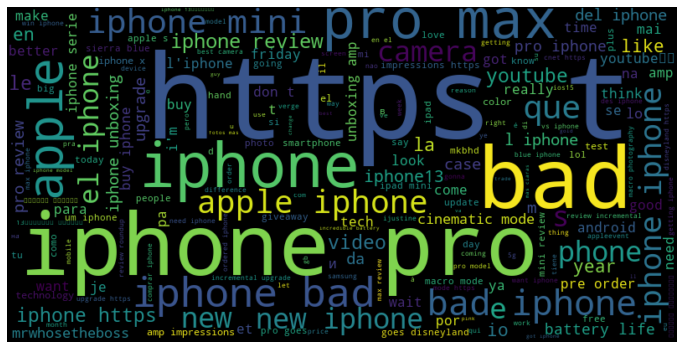

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')

## BERT

In [ ]:
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
iphone_tweets['rawContent'][963]

'tim said iight get iphone 13 pro max https://t.co/ez4q0q5yvv'

In [ ]:
senti_score=[0]*len(iphone_tweets)
for ind in range(0, len(iphone_tweets)):
  senti_score[ind] = classifier(iphone_tweets['rawContent'][ind])[0]['score']

In [ ]:
senti_score

[0.4642724394798279,
 0.5497662425041199,
 0.4158676266670227,
 0.4691281020641327,
 0.6151019930839539,
 0.8201157450675964,
 0.37455087900161743,
 0.5400276184082031,
 0.28584736585617065,
 0.43940895795822144,
 0.6704105138778687,
 0.4007420241832733,
 0.40100547671318054,
 0.7153216004371643,
 0.3251173496246338,
 0.5347627401351929,
 0.44009432196617126,
 0.5891441702842712,
 0.40686628222465515,
 0.27453896403312683,
 0.3540796637535095,
 0.5329754948616028,
 0.3221833407878876,
 0.4635544419288635,
 0.5715993642807007,
 0.3221918046474457,
 0.3828694224357605,
 0.30770009756088257,
 0.3874564468860626,
 0.6797046661376953,
 0.23634368181228638,
 0.3760025203227997,
 0.26911962032318115,
 0.3767848312854767,
 0.25703006982803345,
 0.6897493600845337,
 0.6407431364059448,
 0.27956143021583557,
 0.5508185625076294,
 0.6857795715332031,
 0.24754147231578827,
 0.41541439294815063,
 0.3925062417984009,
 0.6281879544258118,
 0.3777484893798828,
 0.27507439255714417,
 0.6476434469223022

In [ ]:
iphone_tweets['BERT sentimental score'] = senti_score

In [ ]:
iphone_tweets.head()

Unnamed: 0                           _type  \
0           0  snscrape.modules.twitter.Tweet   
1           1  snscrape.modules.twitter.Tweet   
2           2  snscrape.modules.twitter.Tweet   
3           3  snscrape.modules.twitter.Tweet   
4           4  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/310log/status/144046576094...   
1  https://twitter.com/sraj49/status/144046559468...   
2  https://twitter.com/musicalantlers/status/1440...   
3  https://twitter.com/itzjoshtho/status/14404654...   
4  https://twitter.com/eduardomesck/status/144046...   

                        date  \
0  2021-09-21 23:59:34+00:00   
1  2021-09-21 23:58:54+00:00   
2  2021-09-21 23:58:28+00:00   
3  2021-09-21 23:58:25+00:00   
4  2021-09-21 23:58:08+00:00   

                                          rawContent  \
0  Â∏´Âå†ÂΩìÁÑ∂Ë≤∑„Å£„Å¶„Åü ipad mini 6„ÅØ„ÄÅiphone 13„Çà„ÇäÊ¨≤„Åó„ÅÑÁ´ØÊú´„ÉÉ!!! „Å¶„ÅÑ„ÅÜ...   
1  @lanawithanxiety 5000 mah battery, best camera...   
2  @stevenraymorris currently pro 12 max, i‚Äôm ‚Äúdo...   
3  fuming shite iphone 13 pro max is, heart set b...   
4  a√≠ que ran√ßo, cases iphone 12 n√£o v√£o servir i...   

                                     renderedContent                   id  \
0  Â∏´Âå†ÂΩìÁÑ∂Ë≤∑„Å£„Å¶„Åü„ÄÄiPad mini 6„ÅØ„ÄÅiPhone 13„Çà„ÇäÊ¨≤„Åó„ÅÑÁ´ØÊú´„ÉÉ!!!„ÄÄ„Å¶„ÅÑ„ÅÜ...  1440465760942313479   
1  @lanawithanxiety With 5000 mah battery, best c...  1440465594684379138   
2  @StevenRayMorris I currently have the Pro 12 M...  1440465482025357320   
3  Fuming at how shite the IPhone 13 Pro Max is, ...  1440465469056565253   
4  a√≠ que ran√ßo, as cases do iphone 12 n√£o v√£o se...  1440465399162630150   

                                                user  replyCount  \
0  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
2  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
3  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
4  {'_type': 'snscrape.modules.twitter.User', 'us...           1   

   retweetCount  ...  cashtags  card        country  \
0             0  ...       NaN   NaN   Not recorded   
1             0  ...       NaN   NaN      Singapore   
2             0  ...       NaN   NaN   Not recorded   
3             0  ...       NaN   NaN   Not recorded   
4             1  ...       NaN   NaN  United States   

                                               score negative neutral  \
0  {'neg': 0.327, 'neu': 0.673, 'pos': 0.0, 'comp...    0.327   0.673   
1  {'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'comp...    0.000   0.662   
2  {'neg': 0.046, 'neu': 0.686, 'pos': 0.268, 'co...    0.046   0.686   
3  {'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'comp...    0.333   0.667   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.000   1.000   

  positive compound sentiment  BERT sentimental score  
0    0.000  -0.6571  negative                0.464272  
1    0.338   0.8481  positive                0.549766  
2    0.268   0.7783  positive                0.415868  
3    0.000  -0.7579  negative                0.469128  
4    0.000   0.0000   neutral                0.615102  

[5 rows x 37 columns]

In [ ]:
def polarity_score_BERT(compound):
    if compound > 0.55:
        return "positive"
    elif compound < 0.45:
        return "negative"
    elif compound < 0.55 and compound > 0.45:
        return "neutral"

The bifurcation of score for BERT is a bit different, as it ranges from [0,1]. And since neutral range lie at a fine difference between negative and positive, which is 0.5, we need to set a different range for neutral which is [0.45, 0.55].

In [ ]:
iphone_tweets['BERT sentiment'] = iphone_tweets['BERT sentimental score'].apply(lambda val: polarity_score_BERT(val))

In [ ]:
fig = px.histogram(iphone_tweets, x='BERT sentiment', color = 'BERT sentiment', color_discrete_map = color_code)
fig.show()

# Sentimental Analysis for iphone 13 post-release data

## Vader

In [ ]:
iphone_tweets_post = pd.read_csv("iphone_13_post_release.csv")

In [ ]:
iphone_tweets_post.isna().sum()

Unnamed: 0             0
_type                  0
url                    0
date                   0
rawContent             0
renderedContent        0
id                     0
user                   0
replyCount             0
retweetCount           0
likeCount              0
quoteCount             0
conversationId         0
lang                   0
source                 0
sourceUrl              0
sourceLabel            0
links               3544
media               4208
retweetedTweet      5000
quotedTweet         4904
inReplyToTweetId    4026
inReplyToUser       4026
mentionedUsers      2257
coordinates         4907
place               4907
hashtags            2774
cashtags            4992
card                3983
dtype: int64

In [ ]:
iphone_tweets_post.dropna(subset=['rawContent'], inplace=True)

In [ ]:
iphone_tweets_post['rawContent'] = iphone_tweets_post['rawContent'].apply(lambda txt: txt.lower())

In [ ]:
stop_words=stopwords.words('english')
iphone_tweets_post['rawContent'] = iphone_tweets_post['rawContent'].apply(lambda txt: ' '.join([word for word in txt.split() if word not in stop_words]))

In [ ]:
iphone_tweets_post['rawContent'] = iphone_tweets_post['rawContent'].apply(lambda txt: sent_tokenize(txt))

In [ ]:
iphone_tweets_post['rawContent'] = iphone_tweets_post['rawContent'].apply(lambda txt: ' '.join(txt))

In [ ]:
sid1 = SentimentIntensityAnalyzer()

In [ ]:
iphone_tweets_post['score'] = iphone_tweets_post['rawContent'].apply(lambda txt: sid1.polarity_scores(txt))

In [ ]:
iphone_tweets_post['negative'] = iphone_tweets_post['score'].apply(lambda txt: txt['neg'])
iphone_tweets_post['neutral'] = iphone_tweets_post['score'].apply(lambda txt: txt['neu'])
iphone_tweets_post['positive'] = iphone_tweets_post['score'].apply(lambda txt: txt['pos'])
iphone_tweets_post['compound'] = iphone_tweets_post['score'].apply(lambda txt: txt['compound'])

In [ ]:
def polarity_score(compound):
    if compound > 0:
        return "positive"
    elif compound < 0:
        return "negative"
    elif compound == 0:
        return "neutral"

In [ ]:
iphone_tweets_post['sentiment'] = iphone_tweets_post['compound'].apply(lambda val: polarity_score(val))
iphone_tweets_post.head()

Unnamed: 0                           _type  \
0           0  snscrape.modules.twitter.Tweet   
1           1  snscrape.modules.twitter.Tweet   
2           2  snscrape.modules.twitter.Tweet   
3           3  snscrape.modules.twitter.Tweet   
4           4  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/C18599370Chavez/status/157...   
1  https://twitter.com/niKz9GSF30KDCBa/status/157...   
2  https://twitter.com/luvvzj/status/157273717906...   
3  https://twitter.com/TheCopySloth/status/157273...   
4  https://twitter.com/joabdeivyson/status/157273...   

                        date  \
0  2022-09-21 23:59:56+00:00   
1  2022-09-21 23:59:22+00:00   
2  2022-09-21 23:58:58+00:00   
3  2022-09-21 23:58:26+00:00   
4  2022-09-21 23:57:54+00:00   

                                          rawContent  \
0  iphone 14 vs iphone 13 - ¬øcambia algo? https:/...   
1  apple iphone 13 (128gb) - „Éü„ÉÉ„Éâ„Éä„Ç§„Éàsim„Éï„É™„Éº 5gÂØæÂøú am...   
2                        iphone 13 camera yes! bad üíî   
3  @jenna_streety phones ‚Äòspensive!! new iphone o...   
4  meu cunhado comprou 166 cotas sorteio iphone 1...   

                                     renderedContent                   id  \
0  iPHONE 14 vs iPHONE 13 - ¬øCambia Algo? youtu.b...  1572737422684717058   
1  Apple iPhone 13 (128GB) - „Éü„ÉÉ„Éâ„Éä„Ç§„ÉàSIM„Éï„É™„Éº 5GÂØæÂøú\nA...  1572737280397090816   
2                       iphone 13 camera is so bad üíî  1572737179063054336   
3  @Jenna_Streety Phones are ‚Äòspensive!! But now ...  1572737045402902529   
4  Meu cunhado comprou 166 cotas no sorteio do iP...  1572736910254039040   

                                                user  replyCount  \
0  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
2  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
3  {'_type': 'snscrape.modules.twitter.User', 'us...           1   
4  {'_type': 'snscrape.modules.twitter.User', 'us...           0   

   retweetCount  ...  place  hashtags  cashtags  \
0             0  ...    NaN       NaN       NaN   
1             0  ...    NaN       NaN       NaN   
2             0  ...    NaN       NaN       NaN   
3             0  ...    NaN       NaN       NaN   
4             0  ...    NaN       NaN       NaN   

                                                card  \
0  {'_type': 'snscrape.modules.twitter.PlayerCard...   
1  {'_type': 'snscrape.modules.twitter.SummaryCar...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                               score negative neutral  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.000   1.000   
1  {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...    0.000   0.841   
2  {'neg': 0.399, 'neu': 0.316, 'pos': 0.284, 'co...    0.399   0.316   
3  {'neg': 0.142, 'neu': 0.77, 'pos': 0.088, 'com...    0.142   0.770   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.000   1.000   

  positive compound  sentiment  
0    0.000   0.0000    neutral  
1    0.159   0.1779   positive  
2    0.284  -0.2714   negative  
3    0.088   0.1739   positive  
4    0.000   0.0000    neutral  

[5 rows x 35 columns]

In [ ]:
iphone_tweets_post.loc[2]['rawContent']

'iphone 13 camera yes! bad üíî'

In [ ]:
iphone_tweets_post.loc[293]['rawContent']

'iphone 13 service acting real bad anyone else connection issues?'

In [ ]:
iphone_tweets_post['sentiment']

0        neutral
1       positive
2       negative
3       positive
4        neutral
          ...   
4995     neutral
4996    positive
4997    positive
4998     neutral
4999     neutral
Name: sentiment, Length: 5000, dtype: object

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
color_code = {'negative': '#C41E3A', 'positive': '#0094DE', 'neutral':'#61727B'}

In [ ]:
fig = px.histogram(iphone_tweets_post, x='sentiment', color = 'sentiment', color_discrete_map = color_code)
fig.show()

In [ ]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [ ]:
tweets = " ".join(iphone_tweets_post['rawContent'])

word_cloud = WordCloud(stopwords = ENGLISH_STOP_WORDS,
                       width = 800, 
                       height = 400)

word_cloud.generate(tweets)

(-0.5, 799.5, 399.5, -0.5)

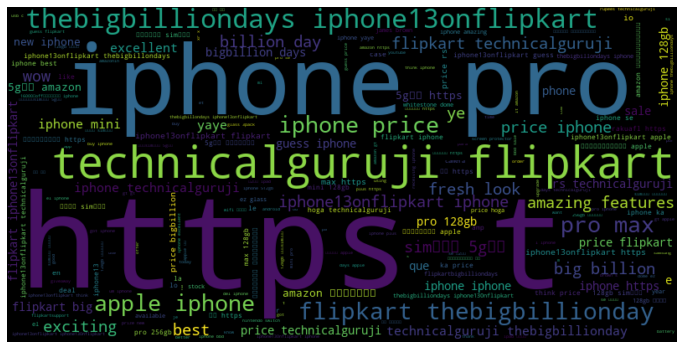

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')

## BERT

In [ ]:
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

In [ ]:
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
iphone_tweets_post['rawContent'][963]

'apple iphone fresh look 13 mini (128gb) https://t.co/gvnegodene 73,990 rs. 64,900 rs. [9,090 rs. off] #amazongreatindianfestivalsale'

In [ ]:
senti_score_post=[0]*len(iphone_tweets_post)
for ind in range(0, len(iphone_tweets_post)):
  senti_score_post[ind] = classifier(iphone_tweets_post['rawContent'][ind])[0]['score']

In [ ]:
senti_score_post

[0.2588058412075043,
 0.3113737106323242,
 0.6436103582382202,
 0.8898530006408691,
 0.3571403920650482,
 0.8183369040489197,
 0.6764004826545715,
 0.5158019661903381,
 0.43126145005226135,
 0.5972422957420349,
 0.8803989887237549,
 0.801010012626648,
 0.42169398069381714,
 0.532625675201416,
 0.477571040391922,
 0.8222318291664124,
 0.306930273771286,
 0.35216349363327026,
 0.5997455716133118,
 0.4096755087375641,
 0.27169525623321533,
 0.3061484396457672,
 0.47820526361465454,
 0.5358189344406128,
 0.46801701188087463,
 0.49316927790641785,
 0.5583497285842896,
 0.3260362148284912,
 0.42299309372901917,
 0.7565783858299255,
 0.398056298494339,
 0.35541874170303345,
 0.3297308087348938,
 0.26047301292419434,
 0.2642262578010559,
 0.4092676341533661,
 0.6613219976425171,
 0.2369839996099472,
 0.3715854287147522,
 0.6363552212715149,
 0.4448632299900055,
 0.5749080777168274,
 0.3484514057636261,
 0.5269419550895691,
 0.658100426197052,
 0.33152854442596436,
 0.3080654740333557,
 0.48452

In [ ]:
iphone_tweets_post['BERT sentimental score'] = senti_score_post

In [ ]:
iphone_tweets_post.head()

Unnamed: 0                           _type  \
0           0  snscrape.modules.twitter.Tweet   
1           1  snscrape.modules.twitter.Tweet   
2           2  snscrape.modules.twitter.Tweet   
3           3  snscrape.modules.twitter.Tweet   
4           4  snscrape.modules.twitter.Tweet   

                                                 url  \
0  https://twitter.com/C18599370Chavez/status/157...   
1  https://twitter.com/niKz9GSF30KDCBa/status/157...   
2  https://twitter.com/luvvzj/status/157273717906...   
3  https://twitter.com/TheCopySloth/status/157273...   
4  https://twitter.com/joabdeivyson/status/157273...   

                        date  \
0  2022-09-21 23:59:56+00:00   
1  2022-09-21 23:59:22+00:00   
2  2022-09-21 23:58:58+00:00   
3  2022-09-21 23:58:26+00:00   
4  2022-09-21 23:57:54+00:00   

                                          rawContent  \
0  iphone 14 vs iphone 13 - ¬øcambia algo? https:/...   
1  apple iphone 13 (128gb) - „Éü„ÉÉ„Éâ„Éä„Ç§„Éàsim„Éï„É™„Éº 5gÂØæÂøú am...   
2                        iphone 13 camera yes! bad üíî   
3  @jenna_streety phones ‚Äòspensive!! new iphone o...   
4  meu cunhado comprou 166 cotas sorteio iphone 1...   

                                     renderedContent                   id  \
0  iPHONE 14 vs iPHONE 13 - ¬øCambia Algo? youtu.b...  1572737422684717058   
1  Apple iPhone 13 (128GB) - „Éü„ÉÉ„Éâ„Éä„Ç§„ÉàSIM„Éï„É™„Éº 5GÂØæÂøú\nA...  1572737280397090816   
2                       iphone 13 camera is so bad üíî  1572737179063054336   
3  @Jenna_Streety Phones are ‚Äòspensive!! But now ...  1572737045402902529   
4  Meu cunhado comprou 166 cotas no sorteio do iP...  1572736910254039040   

                                                user  replyCount  \
0  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
1  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
2  {'_type': 'snscrape.modules.twitter.User', 'us...           0   
3  {'_type': 'snscrape.modules.twitter.User', 'us...           1   
4  {'_type': 'snscrape.modules.twitter.User', 'us...           0   

   retweetCount  ...  hashtags  cashtags  \
0             0  ...       NaN       NaN   
1             0  ...       NaN       NaN   
2             0  ...       NaN       NaN   
3             0  ...       NaN       NaN   
4             0  ...       NaN       NaN   

                                                card  \
0  {'_type': 'snscrape.modules.twitter.PlayerCard...   
1  {'_type': 'snscrape.modules.twitter.SummaryCar...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                               score negative neutral  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.000   1.000   
1  {'neg': 0.0, 'neu': 0.841, 'pos': 0.159, 'comp...    0.000   0.841   
2  {'neg': 0.399, 'neu': 0.316, 'pos': 0.284, 'co...    0.399   0.316   
3  {'neg': 0.142, 'neu': 0.77, 'pos': 0.088, 'com...    0.142   0.770   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.000   1.000   

  positive compound sentiment  BERT sentimental score  
0    0.000   0.0000   neutral                0.258806  
1    0.159   0.1779  positive                0.311374  
2    0.284  -0.2714  negative                0.643610  
3    0.088   0.1739  positive                0.889853  
4    0.000   0.0000   neutral                0.357140  

[5 rows x 36 columns]

In [ ]:
def polarity_score_BERT(compound):
    if compound > 0.45:
        return "positive"
    elif compound < 0.4:
        return "negative"
    elif compound < 0.55 and compound > 0.4:
        return "neutral"

In [ ]:
iphone_tweets_post['BERT sentiment'] = iphone_tweets_post['BERT sentimental score'].apply(lambda val: polarity_score_BERT(val))

In [ ]:
fig = px.histogram(iphone_tweets_post, x='BERT sentiment', color = 'BERT sentiment', color_discrete_map = color_code)
fig.show()